# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import gensim
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import l1_min_c
import tensorflow.keras as keras

from sklearn.feature_extraction.text import TfidfVectorizer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import StackingClassifier

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
# YOUR CODE HERE
df = pd.read_csv('data/bookReviewsData.csv')

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
# YOUR CODE HERE
df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


In [5]:
# check if there any missing values
df.isnull().values.any()

False

In [6]:
# check for class imbalance
positive_reviews = df[df['Positive Review'] == True].shape[0]
print("Positive reviews: ", positive_reviews)

negative_reviews = df[df['Positive Review'] == False].shape[0]
print("Negative reviews: ", negative_reviews)

Positive reviews:  980
Negative reviews:  993


In [7]:
# separate feature and label
X = df['Review']
y = df['Positive Review']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=1234)

In [9]:
# initialize the vectorizer to convert text data to numerical
tfidf_vectorizer = TfidfVectorizer(min_df=5, ngram_range=(1,2))
tfidf_vectorizer.fit(X_train)
X_train_vector = tfidf_vectorizer.transform(X_train)
X_test_vector = tfidf_vectorizer.transform(X_test)

In [10]:
vocabulary_size = len(tfidf_vectorizer.vocabulary_)  # retrieve vocabulary and measure its size
vocabulary_size

9140

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [17]:
# create a simple logistic regression pipeline with default parameters
simple_logistic = Pipeline([
    ('tdidf', TfidfVectorizer(min_df=5, ngram_range=(1,2))),
    ('log_reg', LogisticRegression())
])
simple_logistic.fit(X_train, y_train)
print('Model fitting is done!')

# evaluate training accuracy, prediction accuracy and prediction AUC score
y_prob_pred = simple_logistic.predict_proba(X_test)[:,1]
auc_simple_logistic = roc_auc_score(y_test, y_prob_pred)
print('AUC on the test data: {:.4f}'.format(auc_simple_logistic))

y_train_pred = simple_logistic.predict(X_train)
train_accuracy_simple_logistic = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy_simple_logistic)
    
y_test_pred = simple_logistic.predict(X_test)
test_accuracy_simple_logistic = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy_simple_logistic)

Model fitting is done!
AUC on the test data: 0.9277
Training Accuracy: 0.9601081812035159
Test Accuracy: 0.8461538461538461


In [18]:
# perform grid search to improve logistic regression

# range of hyperparameters
hyperparams_C = l1_min_c(X_train_vector, y_train, loss="log") * np.logspace(0, 4, 16)
hyperparams_max_iter = [100, 200, 500]

# create parameter grid
param_grid_log_reg = {
    'log_reg__C': list(hyperparams_C),  
    'log_reg__max_iter' : hyperparams_max_iter,
}
print('Created the grid!')

# create and fit grid search
grid_log_reg = GridSearchCV(simple_logistic, param_grid_log_reg, cv=5)
grid_search_log_reg = grid_log_reg.fit(X_train, y_train)
print('Done grid search!')



Created the grid!
Done grid search!


In [19]:
# print optimal parameters, new training accuracy, new test accuracy, and new AUC score
print('Optimal hyperparameters: {0}'.format(grid_search_log_reg.best_params_))

best_log_reg = grid_search_log_reg.best_estimator_
y_prob_pred = best_log_reg.predict_proba(X_test)[:,1]
auc_best_logistic = roc_auc_score(y_test, y_prob_pred)
print('AUC on the test data: {:.4f}'.format(auc_best_logistic))

y_train_pred = best_log_reg.predict(X_train)
train_accuracy_best_logistic = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy_best_logistic)

y_test_pred = best_log_reg.predict(X_test)
test_accuracy_best_logistic = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy_best_logistic)

Optimal hyperparameters: {'log_reg__C': 2.4127707306272566, 'log_reg__max_iter': 100}
AUC on the test data: 0.9291
Training Accuracy: 0.9858012170385395
Test Accuracy: 0.8441295546558705


In [20]:
# create a simple neural network model that has 3 hidden layers 
# with 64, 32, and 16 units in each layer

simple_nn = keras.Sequential()
input_layer = keras.layers.InputLayer(input_shape=(vocabulary_size,))
simple_nn.add(input_layer)

hidden_layer_1 = keras.layers.Dense(units=64, activation='relu')
simple_nn.add(hidden_layer_1)

hidden_layer_2 = keras.layers.Dense(units=32, activation='relu')
simple_nn.add(hidden_layer_2)

hidden_layer_3 = keras.layers.Dense(units=16, activation='relu')
simple_nn.add(hidden_layer_3)

output_layer = keras.layers.Dense(units=1, activation='sigmoid') 
simple_nn.add(output_layer)
simple_nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                585024    
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 587,649
Trainable params: 587,649
Non-trainable params: 0
_________________________________________________________________


In [21]:
# define optimization function for the simple nn model
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)
simple_nn.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

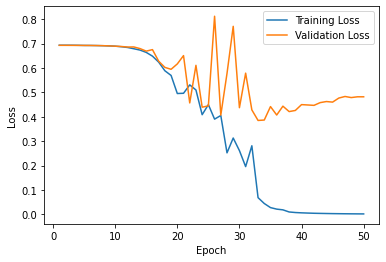

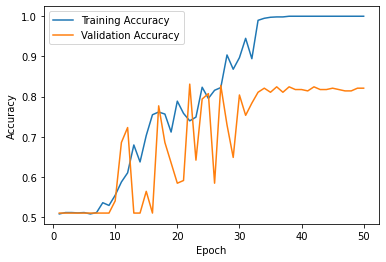

In [22]:
# fit the simple nn model and get initial accuracy results            
num_epochs = 50

history = simple_nn.fit(
    X_train_vector.toarray(),
    y_train,
    epochs=num_epochs,
    verbose=0, 
    validation_split = 0.2,
)

# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

 

In [23]:
# evaluate training accuracy, test accuracy, and prediction AUC score
loss, accuracy = simple_nn.evaluate(X_test_vector.toarray(), y_test)

accuracy_simple_nn = history.history['accuracy']
print("Training Accuracy:", accuracy_simple_nn[-1])

print('Test Accuracy: ', str(accuracy))

y_prob_pred = simple_nn.predict(X_test_vector.toarray())
auc_simple_nn = roc_auc_score(y_test, y_prob_pred)
print('AUC on the test data: {:.4f}'.format(auc_simple_nn))

16/16 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.8320
Training Accuracy: 1.0
Test Accuracy:  0.8319838047027588
AUC on the test data: 0.9121


In [24]:
# use for loop to find the best num_epochs value
# the simple nn model had training accuracy of 1.0 which might indicate overfitting
# so we are looking for a num_epochs value that generate a smaller difference between training
# and testing accuracy
for num_epochs in [26, 28, 30, 32, 36, 38]:
    simple_nn = keras.Sequential()
    input_layer = keras.layers.InputLayer(input_shape=(vocabulary_size,))
    simple_nn.add(input_layer)

    hidden_layer_1 = keras.layers.Dense(units=64, activation='relu')
    simple_nn.add(hidden_layer_1)

    hidden_layer_2 = keras.layers.Dense(units=32, activation='relu')
    simple_nn.add(hidden_layer_2)

    hidden_layer_3 = keras.layers.Dense(units=16, activation='relu')
    simple_nn.add(hidden_layer_3)

    output_layer = keras.layers.Dense(units=1, activation='sigmoid') 
    simple_nn.add(output_layer)
    
    sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)
    loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)
    simple_nn.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])  
    
    history = simple_nn.fit(
        X_train_vector.toarray(),
        y_train,
        epochs=num_epochs,
        verbose=0, 
        validation_split = 0.2,
    )
    
    loss, accuracy = simple_nn.evaluate(X_test_vector.toarray(), y_test)

    print('FOR NUM_EPOCHS VALUE: ', num_epochs)
    accuracy_simple_nn = history.history['accuracy']
    print("Training Accuracy:", accuracy_simple_nn[-1])

    print('Test Accuracy: ', str(accuracy))

    y_prob_pred = simple_nn.predict(X_test_vector.toarray())
    auc_simple_nn = roc_auc_score(y_test, y_prob_pred)
    print('AUC on the test data: {:.4f}'.format(auc_simple_nn))
    
    
# the training and test accuracy values are the closest when num_epoch is 30

16/16 [==============================] - 0s 2ms/step - loss: 0.3758 - accuracy: 0.8360
FOR NUM_EPOCHS VALUE:  26
Training Accuracy: 0.9873203635215759
Test Accuracy:  0.8360323905944824
AUC on the test data: 0.9200
16/16 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.8320
FOR NUM_EPOCHS VALUE:  28
Training Accuracy: 1.0
Test Accuracy:  0.8319838047027588
AUC on the test data: 0.9132
16/16 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.8239
FOR NUM_EPOCHS VALUE:  30
Training Accuracy: 0.9991546869277954
Test Accuracy:  0.8238866329193115
AUC on the test data: 0.9127
16/16 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.8381
FOR NUM_EPOCHS VALUE:  32
Training Accuracy: 0.9991546869277954
Test Accuracy:  0.8380566835403442
AUC on the test data: 0.9119
16/16 [==============================] - 0s 2ms/step - loss: 0.4561 - accuracy: 0.8279
FOR NUM_EPOCHS VALUE:  36
Training Accuracy: 1.0
Test Accuracy:  0.8

In [25]:
# build a stack of results from best performing logistic regression and neural network models

# create the individual models
# best log reg
logreg_model = LogisticRegression(C=2.4127707306272566, max_iter=100)
logreg_model.fit(X_train_vector.toarray(), y_train)

LogisticRegression(C=2.4127707306272566, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
# best nn
nn_model = keras.Sequential()
input_layer = keras.layers.InputLayer(input_shape=(vocabulary_size,))
nn_model.add(input_layer)

hidden_layer_1 = keras.layers.Dense(units=64, activation='relu')
nn_model.add(hidden_layer_1)

hidden_layer_2 = keras.layers.Dense(units=32, activation='relu')
nn_model.add(hidden_layer_2)

hidden_layer_3 = keras.layers.Dense(units=16, activation='relu')
nn_model.add(hidden_layer_3)

output_layer = keras.layers.Dense(units=1, activation='sigmoid') 
nn_model.add(output_layer)

sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

nn_model.fit(X_train_vector.toarray(), y_train, epochs=30, verbose=0, validation_split=0.2)

In [27]:
# make predictions using the logistic regression and neural network models
logreg_predictions = logreg_model.predict_proba(X_train_vector.toarray())[:, 1]
nn_predictions = nn_model.predict(X_train_vector.toarray())

# stack the predictions horizontally
stacked_features = np.column_stack((logreg_predictions, nn_predictions))

# create the final estimator 
final_estimator = LogisticRegression()

# fit the final estimator on the stacked features
final_estimator.fit(stacked_features, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# make predictions on the test set
logreg_test_predictions = logreg_model.predict_proba(X_test_vector.toarray())[:, 1]
nn_test_predictions = nn_model.predict(X_test_vector.toarray())
stacked_test_features = np.column_stack((logreg_test_predictions, nn_test_predictions))
y_pred = final_estimator.predict(stacked_test_features)

# evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

auc = roc_auc_score(y_test, y_pred)
print('AUC on the test data: {:.4f}'.format(auc))

Accuracy: 0.840080971659919
AUC on the test data: 0.8391
